In [5]:
import numpy as np
def funcion_objetivo(vector_representantes,vector_etiquetas,vectores):
    total=0
    for index,label in enumerate(vector_etiquetas):
        vector=vectores[index]
        representante=vector_representantes[label]
        value=np.linalg.norm(vector-representante)**2
        total+=value
    return total/len(vectores)

In [6]:
import numpy as np


def clasificar_k_means(datos,representantes,iteraciones):
    
    vectores=np.array(datos)
    vector_representantes=representantes
    n=iteraciones
    k=len(vector_representantes)
    
    vector_etiquetas=np.arange(0,len(vectores))
    
    valores_funcion_objetivo=[]
    #Efectuar clustering
    for _ in range(0,n):
        #Actualizar etiquetas
        for index_vector,vector in enumerate(vectores):
            distancias=[]
            for index, representante in enumerate(vector_representantes):
                distancia=np.linalg.norm(vector-representante)
                distancias.append(distancia)
            distancias=np.array(distancias)
            vector_etiquetas[index_vector]=np.argmin(distancias)
              
        #Actualizar representantes
        for i in range(0, k):
            vectores_cluster=[]
            for index,etiqueta in enumerate(vector_etiquetas):
                if etiqueta==i:
                    vectores_cluster.append(vectores[index])
            vectores_cluster=np.array(vectores_cluster)
            promedio=np.mean(vectores_cluster, axis=0)
            vector_representantes[i]=promedio
        vector_representantes=np.array(vector_representantes)
        
        value=funcion_objetivo(vector_representantes,vector_etiquetas,vectores)
        valores_funcion_objetivo.append(value)
     
    labels=np.unique(vector_etiquetas)
    centroids=vector_representantes[labels]
    return vector_etiquetas, centroids,np.array(valores_funcion_objetivo)

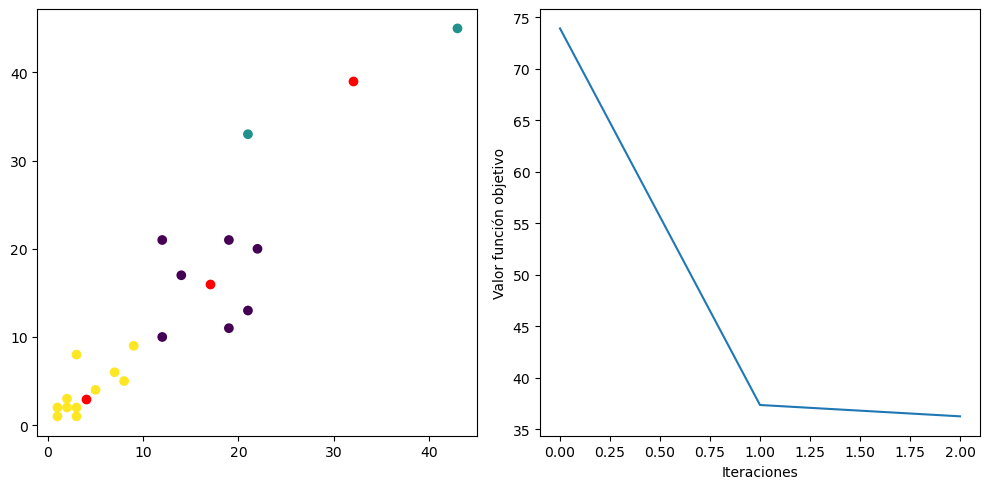

Labels [2 0 2 0 2 0 2 0 2 0 2 0 1 1 0 2 2 2 2 2]
Representantes [[17 16]
 [32 39]
 [ 4  3]]
Valores función objetivo [73.9  37.35 36.25]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

datos=[
    [1,2],
    [12,21],
    [1,1],
    [21,13],
    [5,4],
    [19,11],
    [2,3],
    [14,17],
    [8,5],
    [22,20],
    [3,2],
    [12,10],
    [21,33],
    [43,45],
    [19,21],
    [2,2],
    [3,1],
    [9,9],
    [7,6],
    [3,8]
    ]
num_iteraciones=3
representantes_iniciales=np.array([
    [23,12],
    [21,45],
    [12,21]
])
labels,centroids,valores=k_means_fit(datos,representantes_iniciales,num_iteraciones)
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
datos=np.array(datos)
ax1.scatter(datos[:,0], datos[:,1], c=labels)
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red')
ax2.plot(valores)
ax2.set_xlabel('Iteraciones')
ax2.set_ylabel('Valor función objetivo')
plt.tight_layout()
plt.show()
print(f'Labels {labels}')
print(f'Representantes {centroids}')
print(f'Valores función objetivo {valores}')